# Abalone Case Study

# Dataframe Description

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset


In [3]:
df=pd.read_csv('Abalone')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Successfully Imported Data!

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


From above lines we can learn that there are total 4177 observations with 9 different feature variables/attributes present in the Abalone Case Study dataset.


# Lets find the shape 

In [5]:
df.shape

(4177, 9)

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [8]:
df.head(7)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [9]:
df.tail(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [10]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3582,F,0.625,0.475,0.160,1.3335,0.6050,0.2875,0.3190,10
4048,F,0.625,0.495,0.160,1.2340,0.6335,0.1920,0.3500,13
1092,I,0.460,0.350,0.115,0.4155,0.1800,0.0980,0.1175,7
3804,I,0.355,0.270,0.100,0.2255,0.1100,0.0420,0.0640,7
964,I,0.505,0.355,0.125,0.6010,0.2500,0.1205,0.1850,8


# Data Overview

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


We can see that, all 9 columns are of numeric data types. Out of 9 variables, 8 are predictor variables and last one 'quality' is an response variable.
So, there are 8 numerical not-null features in the data. Feature Sex will need to be changed to dummy values in data preparation in order to use it in the model.

Let's investigate further the data as there is a possibility that some of the values that are not null are set to 0 instead.

In [14]:
# Checking the datatypes of the columns:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])

df['Sex'].value_counts   # 0 for female, 1 for Infants, 2 for Male 

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32>

# Checking Null values in the Dataframe

In [16]:
#Checking the null values in dataset
df.isnull().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Since there is no null value is present, it can be proceeded.

Here Rings is target column in the given Data set

In [18]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [19]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Heatmap for expressing correlation

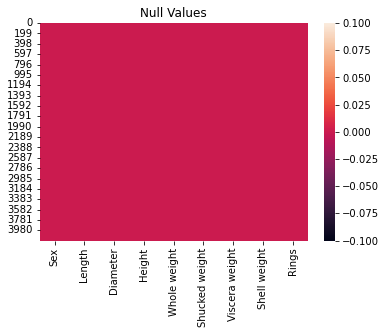

In [20]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Here we can see that there are no null values in given dataset.



# Visualization of the Data

In [64]:
df['Sex'].unique()

array([2, 0, 1])

In [65]:
df_visualization_nominal = df[['Sex']].copy()

In [66]:
df_visualization_nominal.columns

Index(['Sex'], dtype='object')

# Count plot:


2    1528
1    1342
0    1307
Name: Sex, dtype: int64


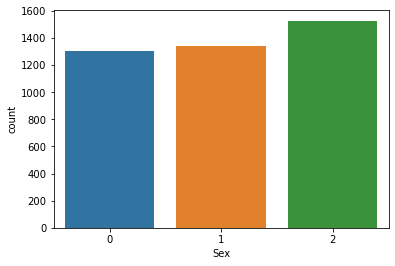

In [67]:
ax = sns.countplot(x='Sex',data=df_visualization_nominal)
print(df_visualization_nominal['Sex'].value_counts())

Observations:
    
In the 'Sex' column they are divided into 3 class 0, 1 and 2 types.
Looking at the count plot there is not much data imbalance comparing the 3 categories.

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

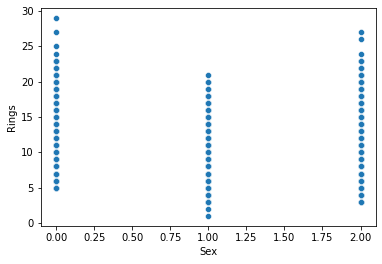

In [21]:
import seaborn as sns
sns.scatterplot(x="Sex",y="Rings",data=df)

<AxesSubplot:xlabel='Length', ylabel='Rings'>

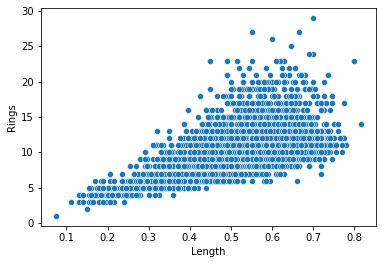

In [22]:
sns.scatterplot(x="Length",y="Rings",data=df)

In [23]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

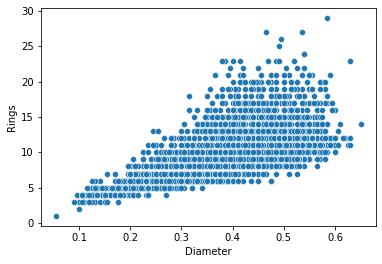

In [24]:
sns.scatterplot(x="Diameter",y="Rings",data=df)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

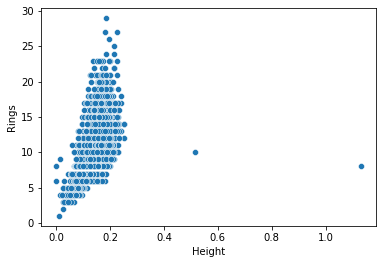

In [25]:
sns.scatterplot(x="Height",y="Rings",data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

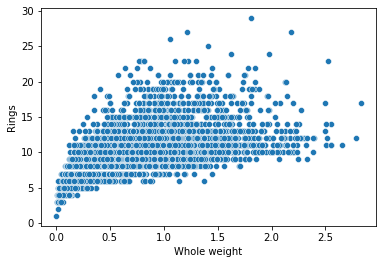

In [26]:
sns.scatterplot(x="Whole weight",y="Rings",data=df)

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

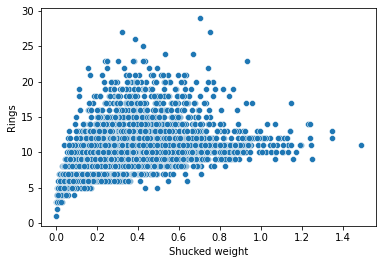

In [27]:
sns.scatterplot(x="Shucked weight",y="Rings",data=df)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

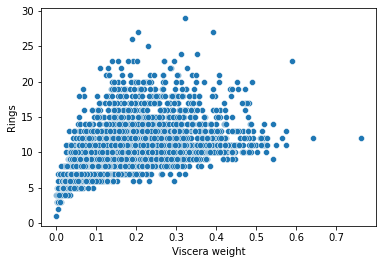

In [28]:
sns.scatterplot(x="Viscera weight",y="Rings",data=df)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

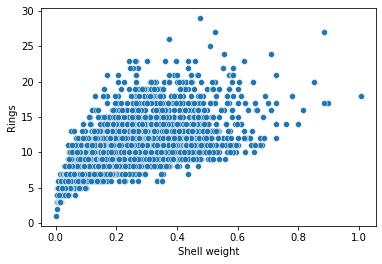

In [29]:
sns.scatterplot(x="Shell weight",y="Rings",data=df)

# Exploratory Data Analysis (EDA)


# Scatterplot:

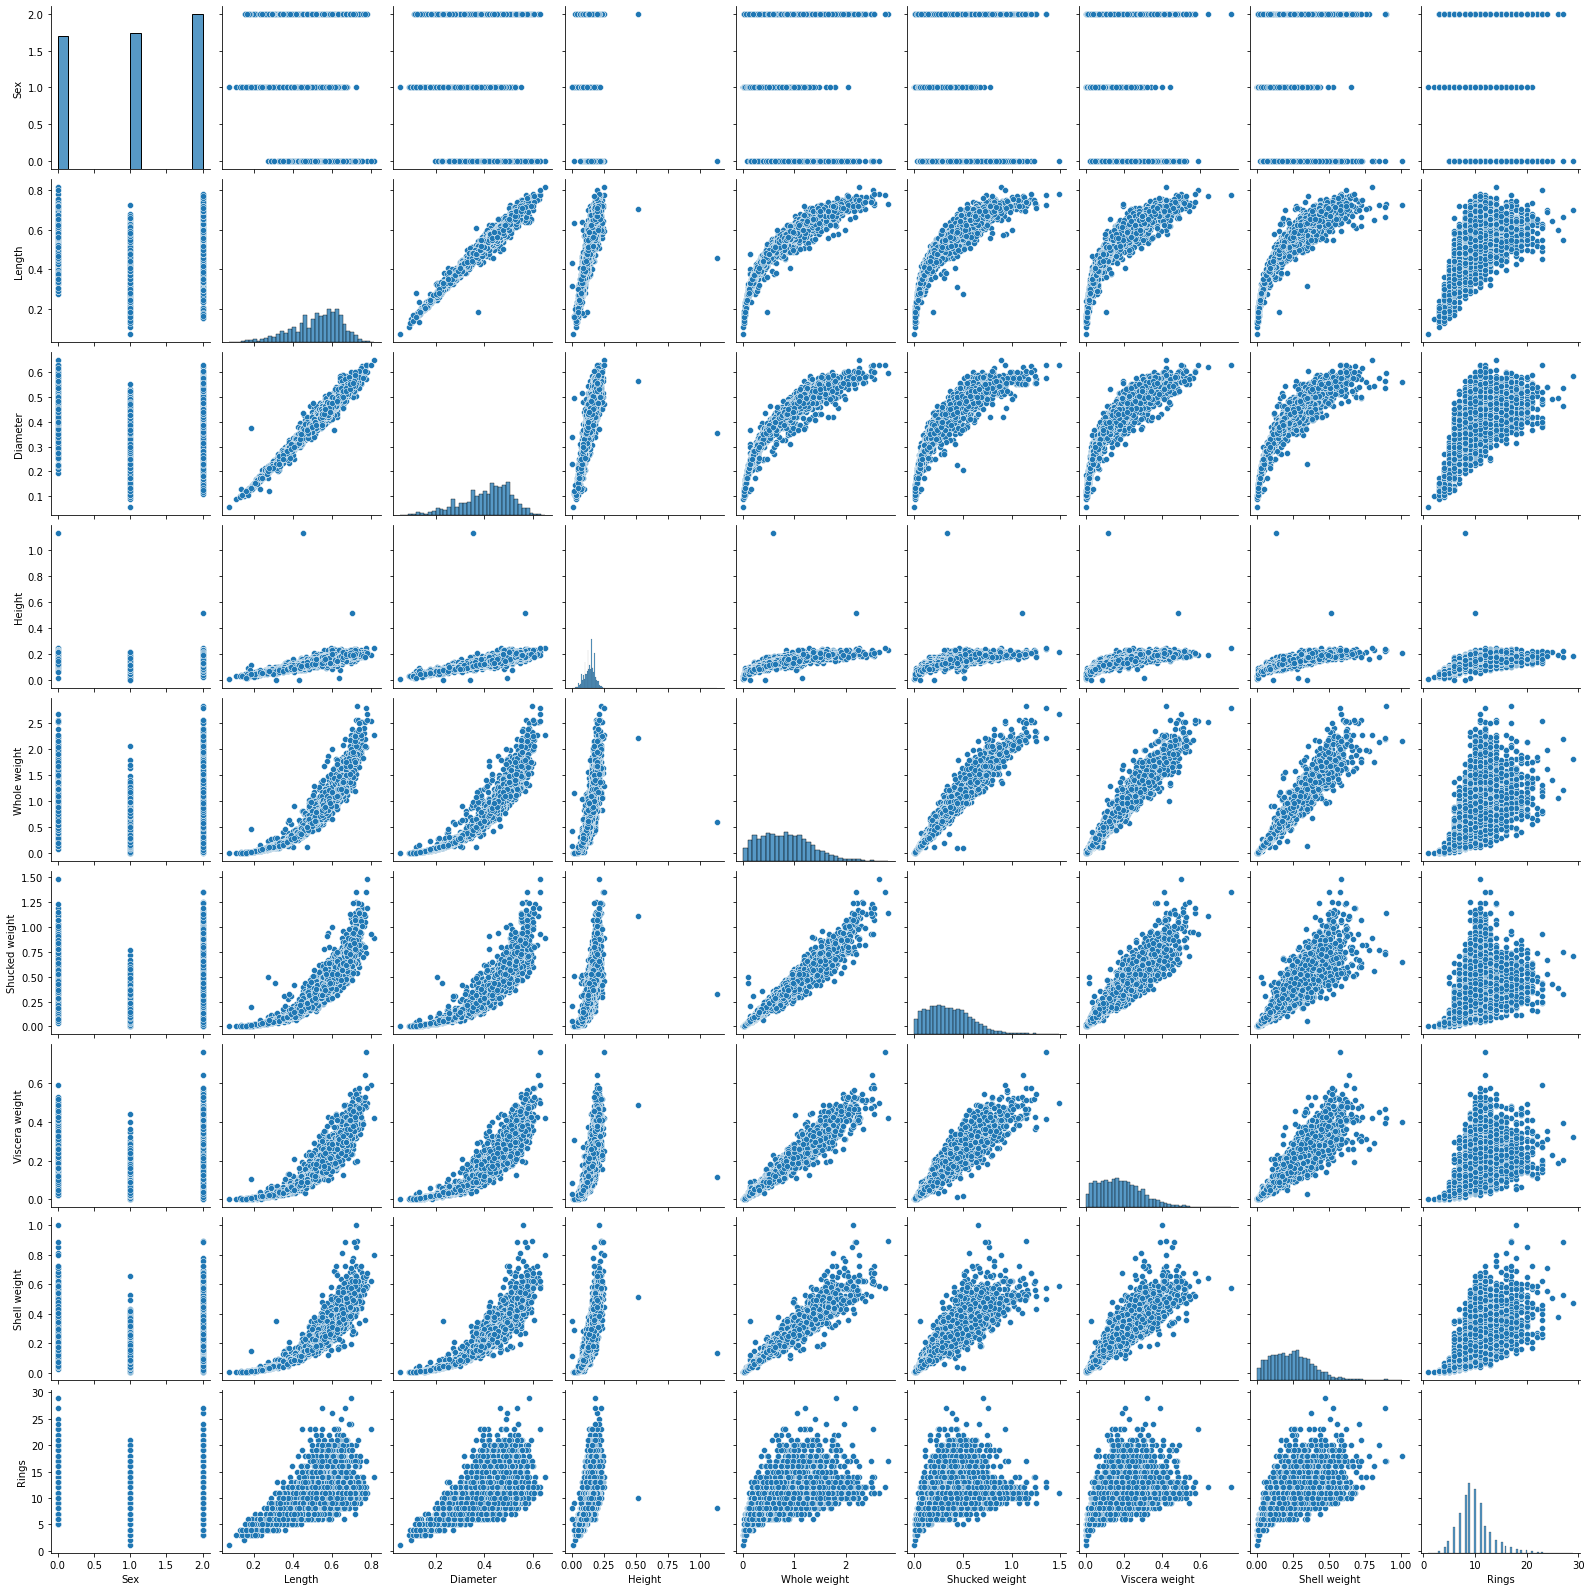

In [30]:
sns.pairplot(df)

Observations:

- Many features are highly correlated
    - length and diameter show linear correlation
    - the length and weight features are quadratic correlated
    - whole weight is linearly correlated with other weight features
- Number of Rings is positively corelated with almost all quadratic features
- Possible outliers in Height features

Scatter plot analysis also shows that data mostly cover the values for Rings from 3 to little over 20, selecting only this data in the model may be taken under consideration to increase the accuracy.

First I will take a closer look at the Height outliers and then I will investigate correlations between the features.

# Skewness

In [86]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Skewness is there in data.
Skewness value points in which direction data is distorted in a statistical distribution, in Gaussian distribution the value for skewness is 0. In abalone data Height has highest skewness value followed by Rings.

High skewness in Height feature may be an outcome of outliers. I will investigate it further using more plots.

# Lets check the Correlation

In [32]:
#Correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

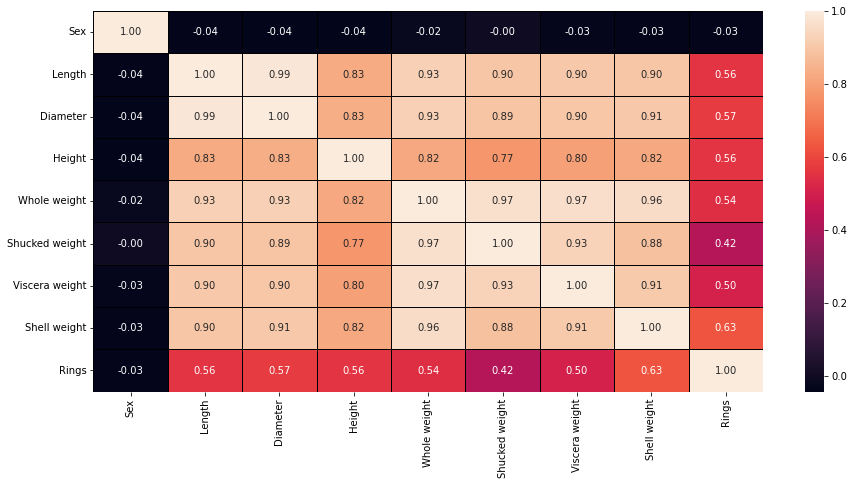

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='0.2f')

The heat map shows that features are highly correlated and multicollinearity is possible.

-Whole weight is almost linearly correlated with all the features except Rings
-Length is linearly correlated with Diameter
-From all the features excluding Rings, Height is least correlated with other features
-Rings feature has the highest correlation with Shell Weight followed by Height, Length and Diameter

Possible solutions for a high level of collinearity in data:

- Use principal component analysis(PCA) to generate new features
- Select partial features for modelling

<AxesSubplot:>

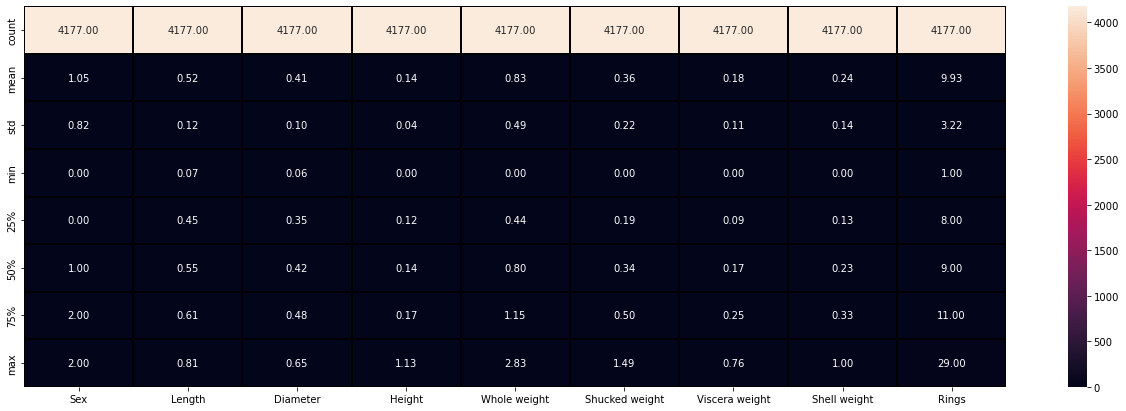

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Checking for Outliers


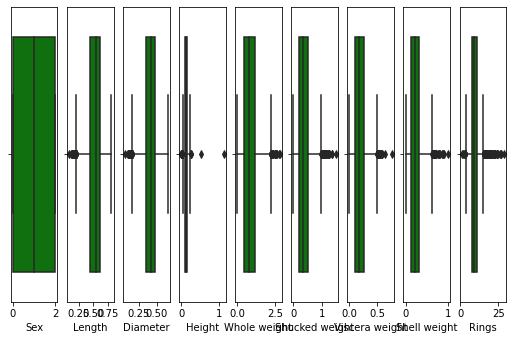

In [34]:
collist=df.columns
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')

<AxesSubplot:>

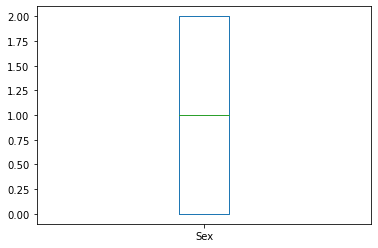

In [69]:
df['Sex'].plot.box()

<AxesSubplot:>

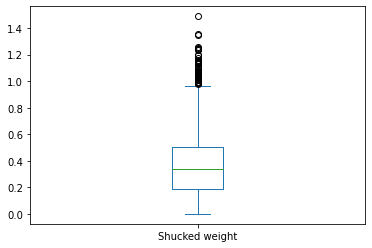

In [70]:
df['Shucked weight'].plot.box()

observations:
    
Height, Rings high outliers are present

Length, Whole weight, Shucked weight, Viscera weight, Shell weight moderate outliers are present

# Normal Distribution Curve

<AxesSubplot:xlabel='Sex', ylabel='Density'>

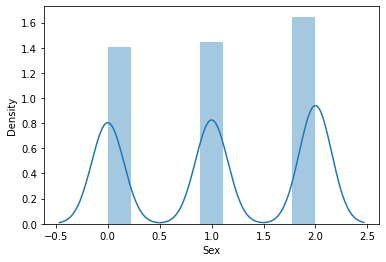

In [35]:
col=df.columns
sns.distplot(df[col[0]])

<AxesSubplot:xlabel='Length', ylabel='Density'>

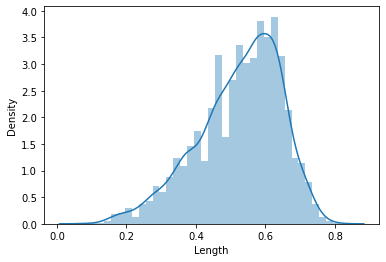

In [36]:
sns.distplot(df[col[1]])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

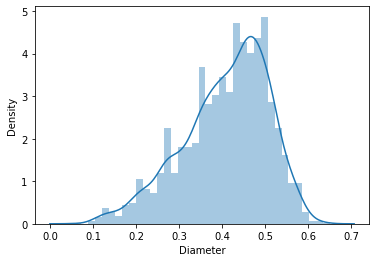

In [37]:
sns.distplot(df[col[2]])

<AxesSubplot:xlabel='Height', ylabel='Density'>

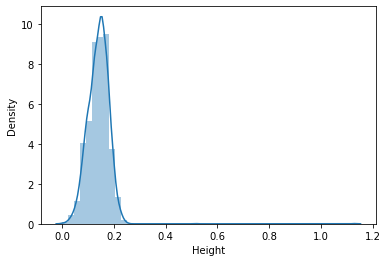

In [38]:
sns.distplot(df[col[3]])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

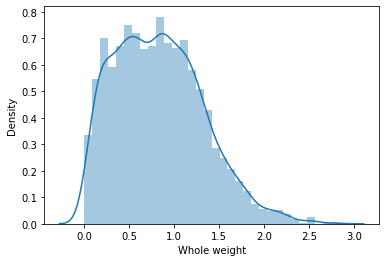

In [39]:
sns.distplot(df[col[4]])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

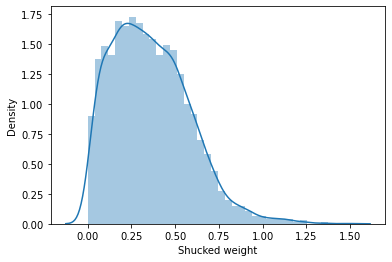

In [40]:
sns.distplot(df[col[5]])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

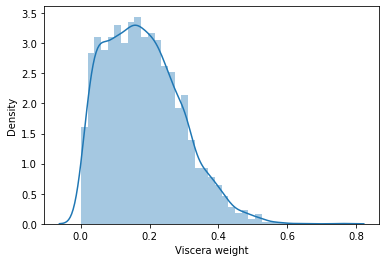

In [41]:
sns.distplot(df[col[6]])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

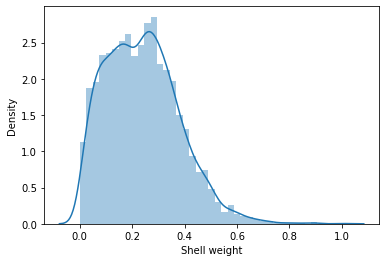

In [42]:
sns.distplot(df[col[7]])

Observations:

Looking at the above distribution plots we can see that there is skewness due to the outliers which we saw in the boxplot. Still there are many that are showing a bell shape curve indicating a normal distribution.



# Removing Outliers

# z score technique:

In [43]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(4177, 9)

threshold=3 print(np.where(z>3))

In [44]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-3 zscore value.

# Percentage Data Loss

In [45]:
loss_percent=((4177-4027)/4177)*100
loss_percent

3.5910940866650707

After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set

3.5% data loss is acceptable.

# Splitting independent and target variables in x and y

In [46]:
x=df_new.drop("Rings",axis=1)
y=df_new["Rings"]

In [47]:
#checking skewness again
x.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

We consider skewness to be +/- 0.65 so we see there is no more skewness is there



# Finding Best Random State


In [52]:
from sklearn.linear_model import LinearRegression
maxScore=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predlm=lm.predict(x_test)
    sc=lm.score(x_train,y_train)
    if sc>maxScore:
        maxScore=sc
        maxRs=i
print("Best Accuracy is ", maxScore,"on Random_State",maxRs)

Best Accuracy is  0.5310646852178886 on Random_State 53


In [49]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=53)

In [50]:
x_train.shape

(3221, 8)

In [51]:
y_train.shape

(3221,)

In [53]:
x_test.shape

(806, 8)

In [54]:
y_test.shape

(806,)

In [56]:
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [57]:
lm.coef_

array([  0.05497449,  -2.49496295,  13.00255897,  22.43775717,
         7.71889056, -18.13029952,  -8.09655492,   7.08191437])

In [58]:
lm.intercept_

2.5526849657696014

In [59]:
lm.score(x_train,y_train)

0.5206354886660784

# predict the value

In [60]:
pred=lm.predict(x_test)
print("Predicted Rings:",pred)
print("Actual Rings",y_test)

Predicted Rings: [10.4211697  11.64533024  6.61828286  9.27517258  8.08990239 12.40773959
 12.84581981 11.10981605 12.18922579 11.93993472  5.38253922  8.41094197
 10.76242436  9.79069405 11.21834503  8.52575415  9.5296968   9.69819227
 13.12189389  8.79916412 10.15162619  7.17168384  9.99714874 12.7067678
 15.31536332 12.24957845 10.77328794 11.25825782  8.10074955 10.28037976
  9.33574948 11.95100792  9.45546886 14.52733643 11.19611584  9.41093087
 11.34931293  8.23037206  9.23028039  5.6867778   9.07827429 12.67611687
 11.6107105   9.98931369 13.55874955 10.10196043  9.26940686  9.49255287
  8.99649017  9.75392624 14.65147357  9.26868138 11.91445402 10.13653905
 11.07328359  8.48113893 14.84913635  8.81546295  6.16602617  6.20583139
  9.42020005 13.17905582 11.78534161 10.99308204  8.88737987 12.8500728
 10.32140223  7.90991183  7.92358644  7.10834097 11.02824192  7.5562191
  8.80813238 14.33200404  8.36344613  9.13010439  5.88239149 10.55362838
 12.26601934 12.66300417  7.13554706 

In [61]:
print('error:')

print('Mean Absolute error: ',mean_absolute_error(y_test,pred))

print('Mean Squared error: ',mean_squared_error(y_test,pred))

print('Root Mean Squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean Absolute error:  1.53067010903173
Mean Squared error:  3.9075647722378286
Root Mean Squared error:  1.9767561236120728


In [62]:
#r2 score --> coefficient of determination
#is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)
#i.e. change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.48369864364546444


# Scalling the data using Min-Max scaller

In [71]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is 0.5178458978075204
At random state 0, the testing accuracy is 0.4941036312407545


At random state 1, the training accuracy is 0.5178458978075204
At random state 1, the testing accuracy is 0.4941036312407545


At random state 2, the training accuracy is 0.5178458978075204
At random state 2, the testing accuracy is 0.4941036312407545


At random state 3, the training accuracy is 0.5178458978075204
At random state 3, the testing accuracy is 0.4941036312407545


At random state 4, the training accuracy is 0.5178458978075204
At random state 4, the testing accuracy is 0.4941036312407545


At random state 5, the training accuracy is 0.5178458978075204
At random state 5, the testing accuracy is 0.4941036312407545


At random state 6, the training accuracy is 0.5178458978075204
At random state 6, the testing accuracy is 0.4941036312407545


At random state 7, the training accuracy is 0.5178458978075204
At random state 7, the testing accuracy is 0.494

At random state 74, the testing accuracy is 0.4941036312407545


At random state 75, the training accuracy is 0.5178458978075204
At random state 75, the testing accuracy is 0.4941036312407545


At random state 76, the training accuracy is 0.5178458978075204
At random state 76, the testing accuracy is 0.4941036312407545


At random state 77, the training accuracy is 0.5178458978075204
At random state 77, the testing accuracy is 0.4941036312407545


At random state 78, the training accuracy is 0.5178458978075204
At random state 78, the testing accuracy is 0.4941036312407545


At random state 79, the training accuracy is 0.5178458978075204
At random state 79, the testing accuracy is 0.4941036312407545


At random state 80, the training accuracy is 0.5178458978075204
At random state 80, the testing accuracy is 0.4941036312407545


At random state 81, the training accuracy is 0.5178458978075204
At random state 81, the testing accuracy is 0.4941036312407545


At random state 82, the training

At random state 12 the model accuracy is 56.let try feature select for improving the accuracy



In [74]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.509151969030969 and accuracy score for training is 0.5178458978075204 and accuracy for the testing is 0.4941036312407545


At cross fold 3 the cv score is 0.495773308280995 and accuracy score for training is 0.5178458978075204 and accuracy for the testing is 0.4941036312407545


At cross fold 4 the cv score is 0.42089930240701956 and accuracy score for training is 0.5178458978075204 and accuracy for the testing is 0.4941036312407545


At cross fold 5 the cv score is 0.4148020401486131 and accuracy score for training is 0.5178458978075204 and accuracy for the testing is 0.4941036312407545


At cross fold 6 the cv score is 0.4266020242275068 and accuracy score for training is 0.5178458978075204 and accuracy for the testing is 0.4941036312407545


At cross fold 7 the cv score is 0.43688004459691265 and accuracy score for training is 0.5178458978075204 and accuracy for the testing is 0.4941036312407545


At cross fold 8 the cv score is 0.39820199962993236 

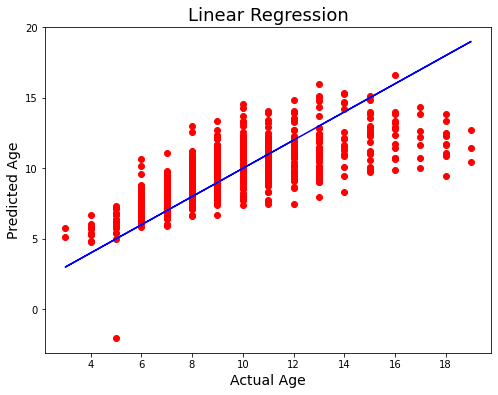

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Age',fontsize=14)
plt.ylabel('Predicted Age',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The best fit line doesnt seem to be covering more than 50% of the points



# Regularization

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [77]:
parameters = {'alpha':[.001, .01, .1, 1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [78]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

51.66467532729225

In [79]:
pred_ls=ls.predict(x_test)

In [80]:
lss=r2_score(y_test,pred_ls)
lss*100

49.36957822853795

In [81]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean*100

41.45603289167368

# KNN Regressor

In [82]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.6667447007643532

Created the K Neighbors Regressor model and checked it's evaluation metrics.


# DecisionTreeRegressor

In [83]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

Created the Decision Tree Regressor model and checked it's evaluation metrics.

# Data Prediction

In [85]:
a=np.array(y_test)
predicted=np.array(lm.predict(x_test))
df_com=pd.DataFrame({"orignal":a,"predicted":predicted},index=range(len(a)))
df_com

,orignal,predicted
0,12,10.658663
1,8,7.524143
2,9,10.783156
3,9,12.236723
4,18,11.731917
...,...,...
801,12,10.244244
802,13,10.434312
803,7,8.297010
804,16,16.584007


# Saving the best model


In [87]:
import joblib
joblib.dump(lm,"Abalone")

['Abalone']

Finally I am saving my best regression model using the joblib library.Hence data is analysed.